In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import csv
import os
from scipy.stats import norm
%matplotlib inline  
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams["font.family"] = 'Sans-serif'
matplotlib.rcParams["font.size"] = 10
sns.set_style('white')

from utils_ddpcr import *

In [3]:
input_folder = './../NIPT_cases/'#'/Users/joan/Desktop/Quakelab/Prenatal/NIPT_diagnosis/'
list_na =['No Call']
cols_probe=['Well','Sample','Target','Positives','Negatives',
          'Ch1+Ch2+', 'Ch1+Ch2-', 'Ch1-Ch2+', 'Ch1-Ch2-']

### NIPT1 - X-linked condition - Hemophilia A


In [71]:
NIPT001_file = input_folder + '20160919_NIPT001diagnostic1.csv'
NIPT001_file2 = input_folder + '20160926_NIPT001-2extrawells.csv'
NIPT001_wells = ['NIPT001','NIPT001pooled','NIPT001pooled2']
NIPT001_mutantprobe = 'NIPT1_2FAM'
NIPT001_WTprobe = 'NIPT1_2VIC'
NIPT001_FF = 25.1
NIPT001_Error_FF = 3.2/math.sqrt(11)
NIPT001_Y = 11.8


df = pd.read_csv(NIPT001_file, sep=',', encoding="'utf-8-sig", index_col=False,usecols=cols_probe ,na_values=list_na)
Nm = allele_counts(df, NIPT001_wells, NIPT001_mutantprobe)
Nwt = allele_counts(df, NIPT001_wells, NIPT001_WTprobe)
print_xlinked(Nm,Nwt,NIPT001_FF,NIPT001_Error_FF)

Mutant counts 2037.6, WT counts 2969.2, Total counts 5006.8
z-value -3.01 
	Positive expected: 20.31 
	Negative expected: 0.00
Mutant Allele Frac 0.407 
	Positive Frac Expected: 0.572 (SD_N:0.011 Err_FF:0.011)    
	Negative Frac Expected:: 0.428 (SD_N:0.009 Err_FF:0.009)
	SPRT low bound 0.499
 	SPRT high bound: 0.501.
SPRT classifier: Fetus is non-affected.


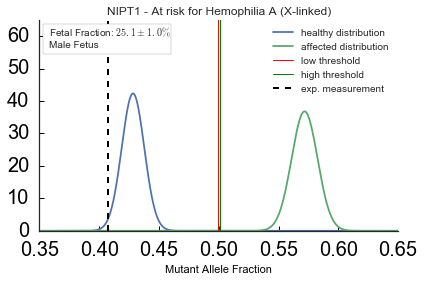

In [72]:
res = allele_fractions_xlinked(Nm,Nwt,NIPT001_FF,NIPT001_Error_FF)
min_x=0.35
max_x=0.65
max_y=65
bins=1000
title='NIPT1 - At risk for Hemophilia A (X-linked)'
file_plot='NIPT1.pdf'
sex_label='Male Fetus'
fetal_fraction_label='Fetal Fraction: $25.1\pm1.0\%$'

x = np.linspace(min_x,max_x,bins)
y = norm.pdf(x, loc=res['frac_negative'], scale=res['TotErr_neg'])
y2 = norm.pdf(x, loc=res['frac_positive'], scale=res['TotErr_pos'])


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y, label='healthy distribution',zorder=1)
ax.plot(x,y2,label='affected distribution',zorder=1)
ax.set_xlim(min_x,max_x)
ax.set_ylim(0.,max_y)
ax.set_xlabel('Mutant Allele Fraction')
ax.axvline(x=res['low_bound'], ymin=0, ymax = 45, linewidth=1, color='red',label='low threshold',zorder=2)
ax.axvline(x=res['up_bound'], ymin=0, ymax = 45, linewidth=1, color='green',label='high threshold',zorder=2)
xbox_start= min_x+0.01*(max_x-min_x)
ybox_start=max_y-0.16*(max_y)
box_width = (max_x-min_x)/2.8
box_height = 0.14*(max_y)
ax.axvline(x=res['frac_experiment'], ymin=0, ymax = max_y, linewidth=2, color='k',linestyle='dashed',label='exp. measurement',zorder=2)
ax.add_patch( patches.Rectangle((xbox_start, ybox_start),   # (x,y)
                                 box_width,          # width
                                 box_height,          # height
                                 ec = "gray",
                                 fc = "white",
                                 zorder=3))
ax.text(xbox_start+0.05*box_width,ybox_start+0.6*box_height,fetal_fraction_label,zorder=4)
ax.text(xbox_start+0.05*box_width,ybox_start+0.2*box_height,sex_label,zorder=4)
ax.legend()
ax.set_axis_bgcolor('white')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='both',which='major',direction='in',length=5,width=1,color='black',pad=10,labelsize=20,labelcolor='black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.set_title(title)
fig.tight_layout()
fig.savefig(file_plot)


### NIPT2  - X-linked condition -  Hemophilia B

In [53]:
NIPT002_file = input_folder + '20160920_NIPT002diagnostic1.csv'
NIPT002_file2 = input_folder + '20160926_NIPT002-1extrawells.csv'
NIPT002_wells = ['NIPT002','NIPT002pooled','NIPT002pooled2']
NIPT002_mutantprobe = 'NIPT2_1FAM'
NIPT002_WTprobe = 'NIPT2_1VIC'
NIPT002_FF = 19.0
NIPT002_Error_FF = 3.7/math.sqrt(7)
NIPT002_Y = 7.3

df = pd.read_csv(NIPT002_file, sep=',', encoding="'utf-8-sig", index_col=False,usecols=cols_probe ,na_values=list_na)
df2 = pd.read_csv(NIPT002_file2, sep=',', encoding="'utf-8-sig", index_col=False,usecols=cols_probe ,na_values=list_na)
df = pd.concat([df,df2])

Nm = allele_counts(df, NIPT002_wells, NIPT002_mutantprobe)
Nwt = allele_counts(df, NIPT002_wells, NIPT002_WTprobe)

print_xlinked(Nm,Nwt,NIPT002_FF,NIPT002_Error_FF)

Mutant counts 4540.0, WT counts 5641.2, Total counts 10181.2
z-value -0.32 
	Positive expected: 21.18 
	Negative expected: 0.00
Mutant Allele Frac 0.446 
	Positive Frac Expected: 0.552 (SD_N:0.007 Err_FF:0.009)    
	Negative Frac Expected:: 0.448 (SD_N:0.007 Err_FF:0.008)
	SPRT low bound 0.500
 	SPRT high bound: 0.500.
SPRT classifier: Fetus is non-affected.


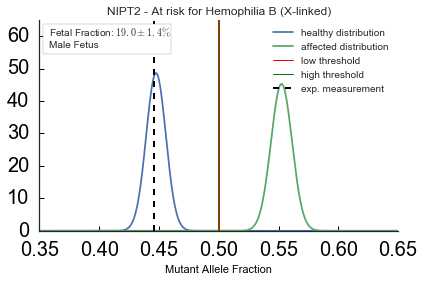

In [54]:
res = allele_fractions_xlinked(Nm,Nwt,NIPT002_FF,NIPT002_Error_FF)
min_x=0.35
max_x=0.65
max_y=65
bins=1000
title='NIPT2 - At risk for Hemophilia B (X-linked)'
file_plot='NIPT2.pdf'
sex_label='Male Fetus'
fetal_fraction_label='Fetal Fraction: $19.0\pm1.4 \%$'

x = np.linspace(min_x,max_x,bins)
y = norm.pdf(x, loc=res['frac_negative'], scale=res['TotErr_neg'])
y2 = norm.pdf(x, loc=res['frac_positive'], scale=res['TotErr_pos'])


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y, label='healthy distribution',zorder=1)
ax.plot(x,y2,label='affected distribution',zorder=1)
ax.set_xlim(min_x,max_x)
ax.set_ylim(0.,max_y)
ax.set_xlabel('Mutant Allele Fraction')
ax.axvline(x=res['low_bound'], ymin=0, ymax = 45, linewidth=1, color='red',label='low threshold',zorder=2)
ax.axvline(x=res['up_bound'], ymin=0, ymax = 45, linewidth=1, color='green',label='high threshold',zorder=2)
xbox_start= min_x+0.01*(max_x-min_x)
ybox_start=max_y-0.16*(max_y)
box_width = (max_x-min_x)/2.8
box_height = 0.14*(max_y)
ax.axvline(x=res['frac_experiment'], ymin=0, ymax = max_y, linewidth=2, color='k',linestyle='dashed',label='exp. measurement',zorder=2)
ax.add_patch( patches.Rectangle((xbox_start, ybox_start),   # (x,y)
                                 box_width,          # width
                                 box_height,          # height
                                 ec = "gray",
                                 fc = "white",
                                 zorder=3))
ax.text(xbox_start+0.05*box_width,ybox_start+0.6*box_height,fetal_fraction_label,zorder=4)
ax.text(xbox_start+0.05*box_width,ybox_start+0.2*box_height,sex_label,zorder=4)
ax.legend()
ax.set_axis_bgcolor('white')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='both',which='major',direction='in',length=5,width=1,color='black',pad=10,labelsize=20,labelcolor='black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.set_title(title)
fig.tight_layout()
fig.savefig(file_plot)


### NIPT4 - Maternally inherited autosomal recessive condition - Mevalonate Kinase Deficiency - 1st term sample

In [55]:
NIPT004_file = input_folder + './../NIPT_diagnosis/20160926_NIPT004diagnostic-2nd.csv'
NIPT004_file2 = input_folder + './../NIPT_diagnosis/20161021_NIPT004diagnostic.csv'
NIPT004_2nd_wells = ['NIPT004-2nd']
NIPT004_mutantprobe = 'NIPT4_2FAM'
NIPT004_WTprobe = 'NIPT4_2VIC'
NIPT004_FF = 3.7
NIPT004_Error_FF = 0.2
Y_chromosome = 1.8

df = pd.read_csv(NIPT004_file, sep=',', encoding="'utf-8-sig", index_col=False,usecols=cols_probe ,na_values=list_na)
df2 = pd.read_csv(NIPT004_file2, sep=',', encoding="'utf-8-sig", index_col=False,usecols=cols_probe ,na_values=list_na)
frames=[df,df2]
df = pd.concat(frames)
Nm = allele_counts(df, NIPT004_2nd_wells, NIPT004_mutantprobe)
Nwt = allele_counts(df, NIPT004_2nd_wells, NIPT004_WTprobe)
print_autosomalrec(Nm,Nwt,NIPT004_FF,NIPT004_Error_FF)

Mutant counts 9758.3, WT counts 9297.8, Total counts 19056.1
z-value 3.34 
	Positive expected: 5.11 
	Negative expected: 0.00
Mutant Allele Frac 0.512 
	Positive Frac Expected: 0.518 (SD_N:0.005 Err_FF:0.005)    
	Negative Frac Expected:: 0.500 (SD_N:0.005 Err_FF:0.005)
	SPRT low bound 0.508
 	SPRT high bound: 0.511.
SPRT classifier: Fetus is affected.


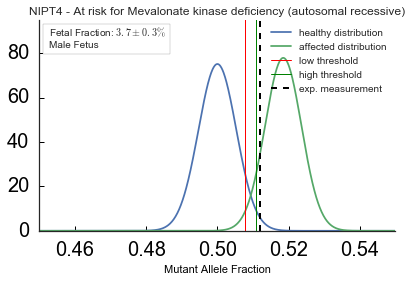

In [56]:
res = allele_fractions_autosomalrec(Nm,Nwt,NIPT004_FF,NIPT004_Error_FF)
min_x=0.45
max_x=0.55
max_y=95
bins=1000
title='NIPT4 - At risk for Mevalonate kinase deficiency (autosomal recessive)'
file_plot='NIPT4-2nd-SPRT.pdf'
sex_label='Male Fetus'
fetal_fraction_label='Fetal Fraction: $3.7\pm0.3 \%$'

x = np.linspace(min_x,max_x,bins)
y = norm.pdf(x, loc=res['frac_negative'], scale=res['TotErr_pos'])
y2 = norm.pdf(x, loc=res['frac_positive'], scale=res['TotErr_neg'])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y, label='healthy distribution',zorder=1)
ax.plot(x,y2,label='affected distribution',zorder=1)
ax.set_xlim(min_x,max_x)
ax.set_ylim(0.,max_y)
ax.set_xlabel('Mutant Allele Fraction')
ax.axvline(x=res['low_bound'], ymin=0, ymax = 45, linewidth=1, color='red',label='low threshold',zorder=2)
ax.axvline(x=res['up_bound'], ymin=0, ymax = 45, linewidth=1, color='green',label='high threshold',zorder=2)
xbox_start= min_x+0.01*(max_x-min_x)
ybox_start=max_y-0.16*(max_y)
box_width = (max_x-min_x)/2.8
box_height = 0.14*(max_y)
ax.axvline(x=res['frac_experiment'], ymin=0, ymax = max_y, linewidth=2, color='k',linestyle='dashed',label='exp. measurement',zorder=2)
ax.add_patch( patches.Rectangle((xbox_start, ybox_start),   # (x,y)
                                 box_width,          # width
                                 box_height,          # height
                                 ec = "gray",
                                 fc = "white",
                                 zorder=3))
ax.text(xbox_start+0.05*box_width,ybox_start+0.6*box_height,fetal_fraction_label,zorder=4)
ax.text(xbox_start+0.05*box_width,ybox_start+0.2*box_height,sex_label,zorder=4)
ax.legend()
ax.set_axis_bgcolor('white')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='both',which='major',direction='in',length=5,width=1,color='black',pad=10,labelsize=20,labelcolor='black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.set_title(title)
fig.tight_layout()
fig.savefig(file_plot)



###  NIPT4- 3rd term sample

In [57]:
NIPT004_3_file = input_folder + './../NIPT_diagnosis/20160926_NIPT004diagnostic-3rd.csv'
NIPT004_3rd_wells = ['NIPT004-3rd']
NIPT004_mutantprobe = 'NIPT4_2FAM'
NIPT004_WTprobe = 'NIPT4_2VIC'
NIPT004_3_FF = 9.2
NIPT004_3_Error_FF = 0.4
Y_chromosome = 4.5

df = pd.read_csv(NIPT004_3_file, sep=',', encoding="'utf-8-sig", index_col=False,usecols=cols_probe ,na_values=list_na)
Nm = allele_counts(df, NIPT004_3rd_wells, NIPT004_mutantprobe)
Nwt = allele_counts(df, NIPT004_3rd_wells, NIPT004_WTprobe)
print_autosomalrec(Nm,Nwt,NIPT004_3_FF,NIPT004_3_Error_FF)

Mutant counts 7060.1, WT counts 5970.9, Total counts 13031.0
z-value 9.54 
	Positive expected: 10.50 
	Negative expected: 0.00
Mutant Allele Frac 0.542 
	Positive Frac Expected: 0.546 (SD_N:0.006 Err_FF:0.007)    
	Negative Frac Expected:: 0.500 (SD_N:0.006 Err_FF:0.006)
	SPRT low bound 0.522
 	SPRT high bound: 0.524.
SPRT classifier: Fetus is affected.


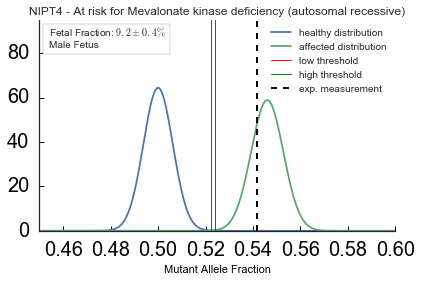

In [58]:
res = allele_fractions_autosomalrec(Nm,Nwt,NIPT004_3_FF,NIPT004_3_Error_FF)

#Do calculation using Dennis Lo method
min_x=0.45
max_x=0.6
max_y=95
bins=1000
title='NIPT4 - At risk for Mevalonate kinase deficiency (autosomal recessive)'
file_plot='NIPT4-3rd.pdf'
sex_label='Male Fetus'
fetal_fraction_label='Fetal Fraction: $9.2\pm0.4 \%$'

x = np.linspace(min_x,max_x,bins)
y = norm.pdf(x, loc=res['frac_negative'], scale=res['TotErr_neg'])
y2 = norm.pdf(x, loc=res['frac_positive'], scale=res['TotErr_pos'])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y, label='healthy distribution',zorder=1)
ax.plot(x,y2,label='affected distribution',zorder=1)
ax.set_xlim(min_x,max_x)
ax.set_ylim(0.,max_y)
ax.set_xlabel('Mutant Allele Fraction')
ax.axvline(x=res['low_bound'], ymin=0, ymax = 45, linewidth=1, color='red',label='low threshold',zorder=2)
ax.axvline(x=res['up_bound'], ymin=0, ymax = 45, linewidth=1, color='green',label='high threshold',zorder=2)
xbox_start= min_x+0.01*(max_x-min_x)
ybox_start=max_y-0.16*(max_y)
box_width = (max_x-min_x)/2.8
box_height = 0.14*(max_y)
ax.axvline(x=res['frac_experiment'], ymin=0, ymax = max_y, linewidth=2, color='k',linestyle='dashed',label='exp. measurement',zorder=2)
ax.add_patch( patches.Rectangle((xbox_start, ybox_start),   # (x,y)
                                 box_width,          # width
                                 box_height,          # height
                                 ec = "gray",
                                 fc = "white",
                                 zorder=3))
ax.text(xbox_start+0.05*box_width,ybox_start+0.6*box_height,fetal_fraction_label,zorder=4)
ax.text(xbox_start+0.05*box_width,ybox_start+0.2*box_height,sex_label,zorder=4)
ax.legend()
ax.set_axis_bgcolor('white')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='both',which='major',direction='in',length=5,width=1,color='black',pad=10,labelsize=20,labelcolor='black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.set_title(title)
fig.tight_layout()
fig.savefig(file_plot)



In [178]:
HTML(line_ani.to_html5_video())
line_ani.save('for_fabio.mp4', bitrate=2000)

### NIPT15 -  Maternally inherited autosomal recessive condition -  beta thalassemia

In [9]:
NIPT015_file = input_folder + '20161216_NIPT015diagnostic.csv'
NIPT015_wells = ['NIPT015']
NIPT015_mutantprobe = 'NIPT5_1FAM'
NIPT015_WTprobe = 'NIPT5_2VIC'
NIPT015_FF = 13.3
NIPT015_Error_FF = 2.3/16
Y_chromosome = 6.8

df = pd.read_csv(NIPT015_file, sep=',', encoding="'utf-8-sig", index_col=False,usecols=cols_probe ,na_values=list_na)
Nm = allele_counts(df, NIPT015_wells, NIPT015_mutantprobe)
Nwt = allele_counts(df, NIPT015_wells, NIPT015_WTprobe)
print_autosomalrec(Nm,Nwt,NIPT015_FF,NIPT015_Error_FF)

Mutant counts 3778.2, WT counts 2938.2, Total counts 6716.4
z-value 10.25 
	Positive expected: 10.90 
	Negative expected: 0.00
Mutant Allele Frac 0.563 
	Positive Frac Expected: 0.567 (SD_N:0.009 Err_FF:0.009)    
	Negative Frac Expected:: 0.500 (SD_N:0.009 Err_FF:0.009)
	SPRT low bound 0.532
 	SPRT high bound: 0.535.
SPRT classifier: Fetus is affected.


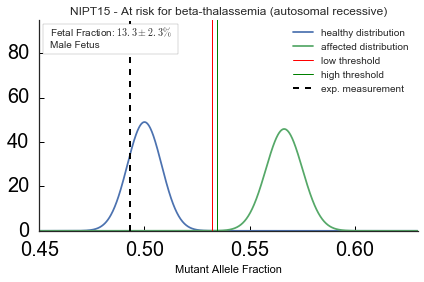

In [20]:

res = allele_fractions_autosomalrec(Nm, Nwt, NIPT015_FF, NIPT015_Error_FF)

#Do calculation using Dennis Lo method
min_x=0.45
max_x=0.63
max_y=95
bins=1000
title='NIPT15 - At risk for beta-thalassemia (autosomal recessive)'
file_plot='NIPT15-1st.pdf'
sex_label='Male Fetus'
fetal_fraction_label='Fetal Fraction: $13.3\pm2.3 \%$'

x = np.linspace(min_x,max_x,bins)
y = norm.pdf(x, loc=res['frac_negative'], scale=res['TotErr_neg'])
y2 = norm.pdf(x, loc=res['frac_positive'], scale=res['TotErr_pos'])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y, label='healthy distribution',zorder=1)
ax.plot(x,y2,label='affected distribution',zorder=1)
ax.set_xlim(min_x,max_x)
ax.set_ylim(0.,max_y)
ax.set_xlabel('Mutant Allele Fraction')
ax.axvline(x=res['low_bound'], ymin=0, ymax = 45, linewidth=1, color='red',label='low threshold',zorder=2)
ax.axvline(x=res['up_bound'], ymin=0, ymax = 45, linewidth=1, color='green',label='high threshold',zorder=2)
xbox_start= min_x+0.01*(max_x-min_x)
ybox_start=max_y-0.16*(max_y)
box_width = (max_x-min_x)/2.8
box_height = 0.14*(max_y)
ax.axvline(x=res['frac_experiment'], ymin=0, ymax = max_y, linewidth=2, color='k',linestyle='dashed',label='exp. measurement',zorder=2)
ax.add_patch( patches.Rectangle((xbox_start, ybox_start),   # (x,y)
                                 box_width,          # width
                                 box_height,          # height
                                 ec = "gray",
                                 fc = "white",
                                 zorder=3))
ax.text(xbox_start+0.05*box_width,ybox_start+0.6*box_height,fetal_fraction_label,zorder=4)
ax.text(xbox_start+0.05*box_width,ybox_start+0.2*box_height,sex_label,zorder=4)
ax.legend()
ax.set_axis_bgcolor('white')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='both',which='major',direction='in',length=5,width=1,color='black',pad=10,labelsize=20,labelcolor='black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.set_title(title)
fig.tight_layout()
fig.savefig(file_plot)
